In [1]:
import io
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
plt.rcParams['figure.figsize']  = (16, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [3]:
plt.ion()
plt.style.use('seaborn-colorblind')

In [4]:
conn = sqlite3.connect('sql/sql.db')
cursor = conn.cursor()

In [5]:
f = io.open('sql/trabalho.sql', 'r', encoding='ISO-8859-1')
sql = f.read()
cursor.executescript(sql)

OperationalError: table ANSWERS already exists

In [6]:
query = """
Select NonBeliever, Atheist, COUNTRYCODE
From Religion

"""

ds = pd.read_sql_query(query,conn)
ds["Religiosity"] = 100 -(ds["NonBeliever"] + ds["Atheist"])
ds["NonAtheist"] = 100 - ds["Atheist"]
ds["ReligiousAndAtheists"] = 100 - ds["NonBeliever"]
ds

,NonBeliever,Atheist,COUNTRYCODE,Religiosity,NonAtheist,ReligiousAndAtheists
0,39.6,9.2,21,51.2,90.8,60.4
1,38.6,25.8,4,35.6,74.2,61.4
2,31.0,19.0,25,50.0,81.0,69.0
3,18.5,2.7,14,78.8,97.3,81.5
4,17.6,22.8,10,59.6,77.2,82.4
5,17.3,4.7,19,78.0,95.3,82.7
6,17.1,14.9,1,68.0,85.1,82.9
7,17.0,10.9,8,72.1,89.1,83.0
8,16.6,22.2,7,61.2,77.8,83.4
9,15.4,4.1,0,80.5,95.9,84.6


In [7]:
query = """
Select COUNTRYCODE, Value, Percentage
From Pesos NATURAL JOIN ANSWERS

"""

df = pd.read_sql_query(query,conn)
df["good"] = df["VALUE"] * df["PERCENTAGE"]
goodGirl = df.groupby("COUNTRYCODE").sum()
goodGirl["goodLGBT"] = goodGirl["good"]/goodGirl["PERCENTAGE"]
goodGirl["badLGBT"] = 1 - goodGirl["goodLGBT"]
goodGirl = goodGirl.reset_index()
goodGirl

,COUNTRYCODE,VALUE,PERCENTAGE,good,goodLGBT,badLGBT
0,0,96.0,6629,2334.0,0.352089,0.647911
1,1,96.0,6674,2386.0,0.357507,0.642493
2,2,92.0,6453,1939.5,0.300558,0.699442
3,3,24.0,1688,588.5,0.348637,0.651363
4,4,96.0,6638,2366.0,0.356433,0.643567
5,5,100.0,6919,2458.5,0.355326,0.644674
6,6,85.0,5835,2094.0,0.358869,0.641131
7,7,52.5,3646,1263.0,0.346407,0.653593
8,8,100.0,6966,2434.5,0.349483,0.650517
9,9,100.0,6893,2812.0,0.407950,0.592050


In [8]:
final = ds.merge(goodGirl)
final

,NonBeliever,Atheist,COUNTRYCODE,Religiosity,NonAtheist,ReligiousAndAtheists,VALUE,PERCENTAGE,good,goodLGBT,badLGBT
0,39.6,9.2,21,51.2,90.8,60.4,92.0,6312,2344.0,0.371356,0.628644
1,38.6,25.8,4,35.6,74.2,61.4,96.0,6638,2366.0,0.356433,0.643567
2,31.0,19.0,25,50.0,81.0,69.0,100.0,6879,2768.0,0.402384,0.597616
3,18.5,2.7,14,78.8,97.3,81.5,96.0,6633,2062.0,0.310870,0.689130
4,17.6,22.8,10,59.6,77.2,82.4,100.0,7003,2555.5,0.364915,0.635085
5,17.3,4.7,19,78.0,95.3,82.7,64.5,4444,1497.5,0.336971,0.663029
6,17.1,14.9,1,68.0,85.1,82.9,96.0,6674,2386.0,0.357507,0.642493
7,17.0,10.9,8,72.1,89.1,83.0,100.0,6966,2434.5,0.349483,0.650517
8,16.6,22.2,7,61.2,77.8,83.4,52.5,3646,1263.0,0.346407,0.653593
9,15.4,4.1,0,80.5,95.9,84.6,96.0,6629,2334.0,0.352089,0.647911


In [9]:
x = final["Religiosity"]
x = x  - x.mean()
x = x /x.std()
y = final["badLGBT"]
y = y - y.mean()
y = y /y.std()

X = [[i] for i in x]

model = LinearRegression()
model.fit(X,y)
model.coef_

array([0.44352751])

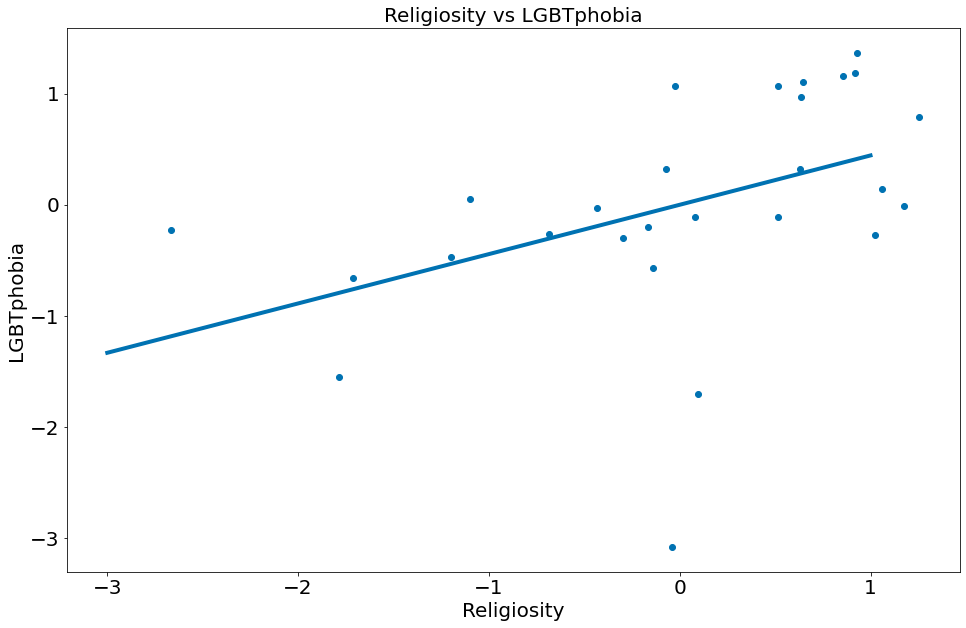

In [10]:
linha = [[-3],[1]]
y_pred = model.predict(linha)
plt.plot(linha,y_pred)
plt.scatter(x,y)

plt.title("Religiosity vs LGBTphobia")
plt.xlabel("Religiosity")
plt.ylabel("LGBTphobia")

plt.show()

In [11]:
x = final["NonAtheist"]
x = x  - x.mean()
x = x /x.std()
y = final["badLGBT"]
y = y - y.mean()
y = y /y.std()

X = [[i] for i in x]

model = LinearRegression()
model.fit(X,y)
model.coef_

array([0.4316762])

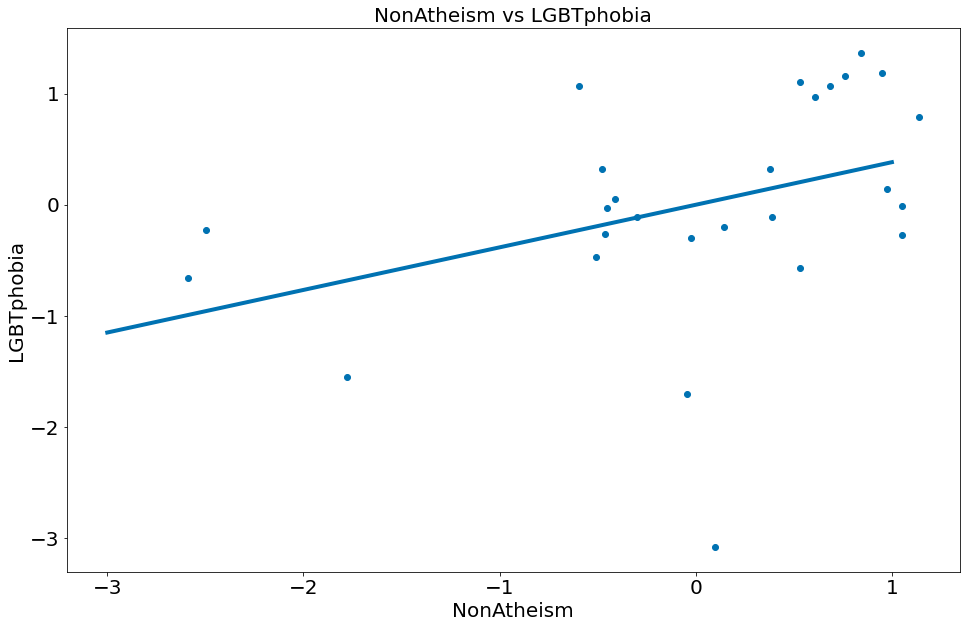

In [16]:
linha = [[-3],[1]]
y_pred = model.predict(linha)
plt.plot(linha,y_pred)
plt.scatter(x,y)

plt.title("NonAtheism vs LGBTphobia")
plt.xlabel("NonAtheism")
plt.ylabel("LGBTphobia")

plt.show()

In [13]:
x = final["ReligiousAndAtheists"]
x = x  - x.mean()
x = x /x.std()
y = final["badLGBT"]
y = y - y.mean()
y = y /y.std()

X = [[i] for i in x]

model = LinearRegression()
model.fit(X,y)
model.coef_

array([0.38282412])

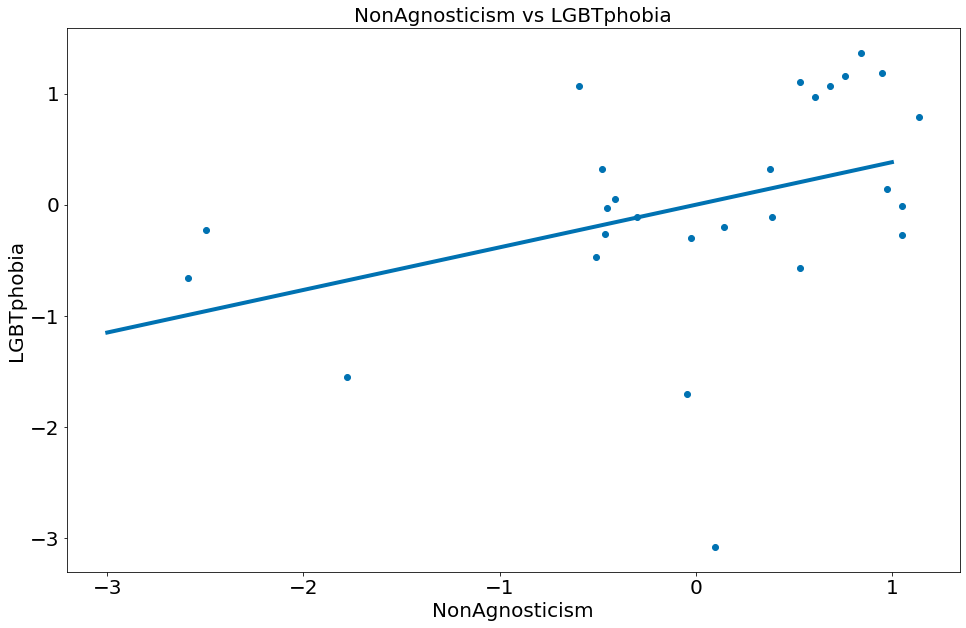

In [17]:
linha = [[-3],[1]]
y_pred = model.predict(linha)
plt.plot(linha,y_pred)
plt.scatter(x,y)

plt.title("NonAgnosticism vs LGBTphobia")
plt.xlabel("NonAgnosticism")
plt.ylabel("LGBTphobia")

plt.show()

    Com base na análise dos dados é possível inferir, de maneira incerta, que a religosidade do país tem certa influência na violência sofrida por pessoas LGBT no mesmo país, embora esse resultado ainda seja preliminar. Foi possível notar através de algumas comparações que os países com maior percentual de ateus apresentaram níveis menores de violência contra LGBT's. Apesar disso a pesquisa ainda é muito nova e incerta tornando impossível ter conclusões muito certas e mais pesquisa é necessária para determinar a existência ou não de alguma relação. Adicionalmente os dados se referem apenas à Europa tornando impossível expandir qualquer conclusão tirada a partir deles para além do cenário europeu.
    A análise sobre o maior impacto do ateísmo se comparada ao agnósticismo foi feita comparando os valores como não agnósticos e não ateístas, bem como o de religiosidade. Já a análise da religiosidade e seu impacto na violência contra LGBT's foi feita no primeiro gráfico.
    